![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-07 </span><h2>
</div>

---
---

## Implement PCA in Python

In [ ]:
import numpy as np

Links:  
https://medium.com/x8-the-ai-community/principal-component-analysis-a-brief-introduction-dc8cf3e03c71


https://medium.com/the-data-league/the-mathematics-and-intuitions-of-principal-component-analysis-pca-using-truncated-singular-b4944e5e95e6

### Step 1: Subtract the mean of each variable
Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

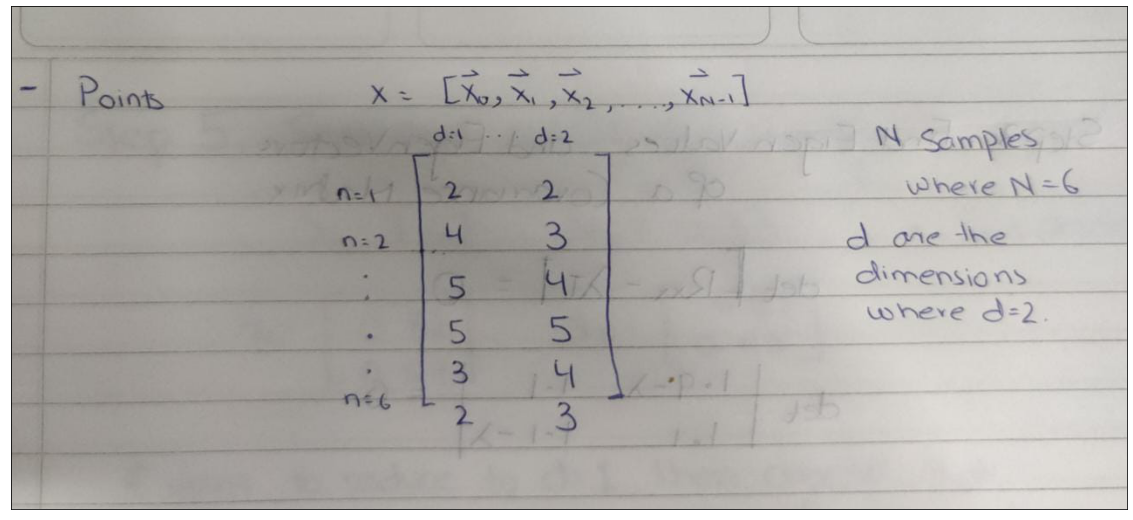

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def showImage(x):    
    plt.figure(figsize=(20,12))
    img = mpimg.imread(str(x) + '.jpeg')
    plt.imshow(img)
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([]) 
showImage(1)

In [ ]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5)
X.shape

(20, 5)

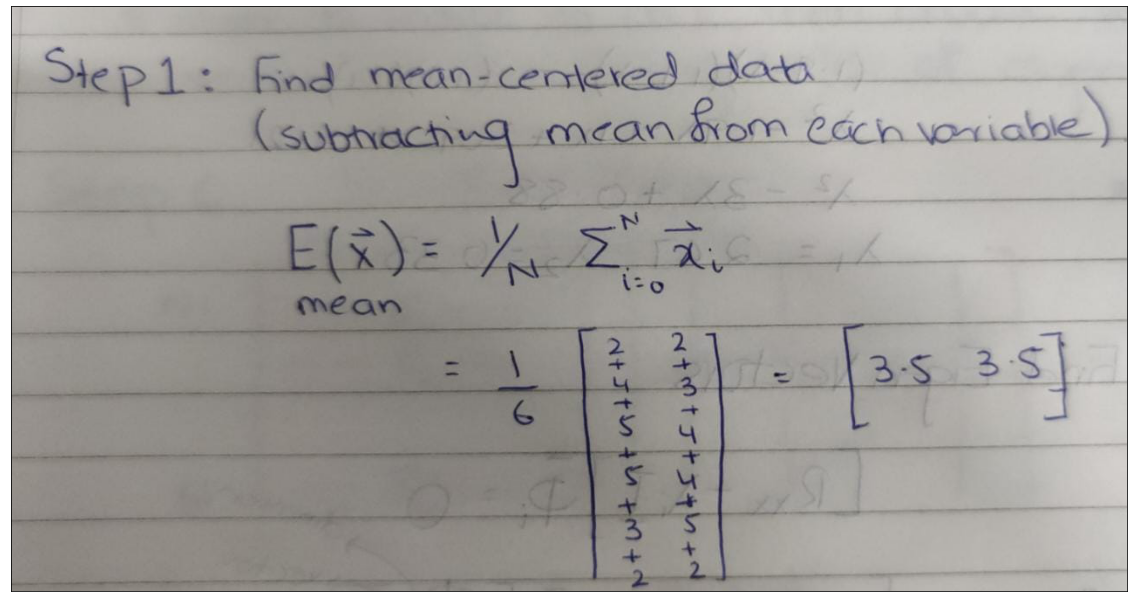

In [ ]:
showImage(2)

In [ ]:
# mean centering the data  
X_meaned = ??

In [ ]:
# mean centering the data  
# X_meaned = X - np.mean(X , axis = 0)

###Step 2: Calculate the Covariance Matrix
Calculate the Covariance Matrix of the mean-centered data. The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.

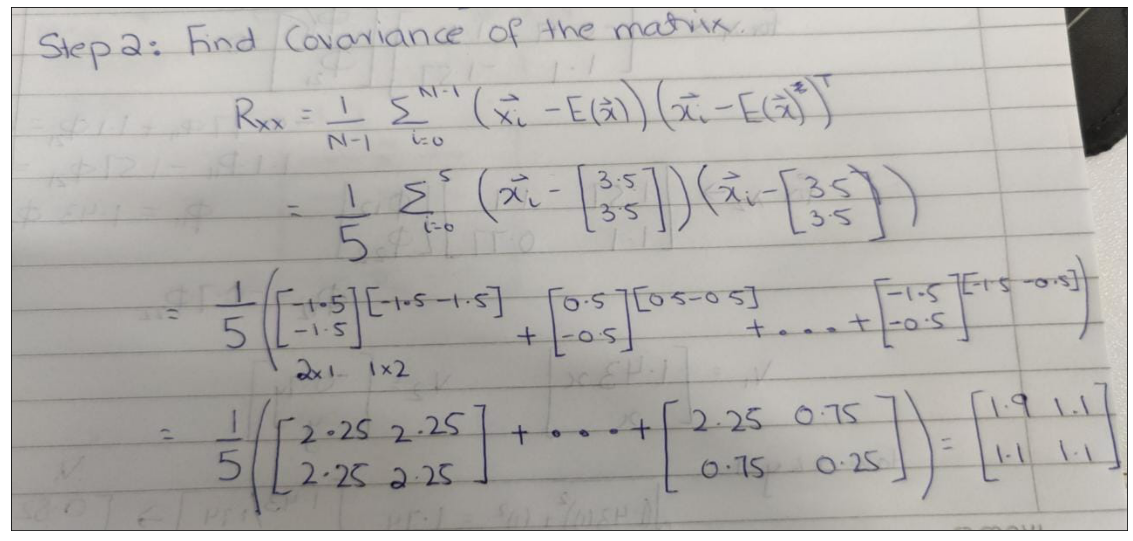

In [ ]:
showImage(3)

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.???(X_meaned , rowvar = ???)

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

###Step 3: Compute the Eigenvalues and Eigenvectors
Compute the Eigenvalues and Eigenvectors for the calculated covariance matrix. The Eigenvectors of the Covariance matrix we get are orthogonal to each other and each vector represents a principal axis.

A higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

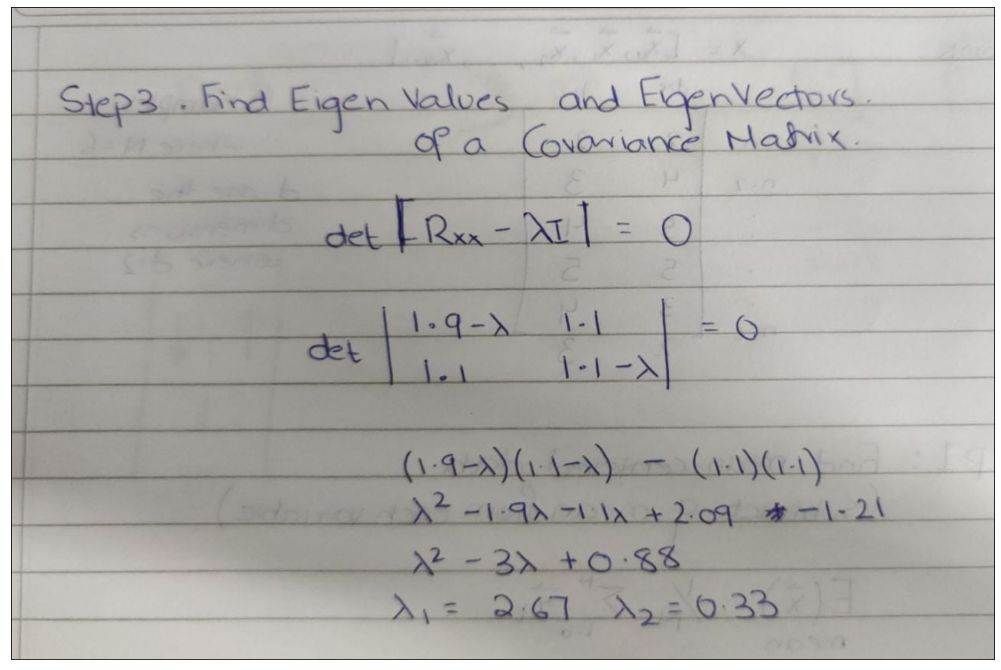

In [ ]:
showImage(4)

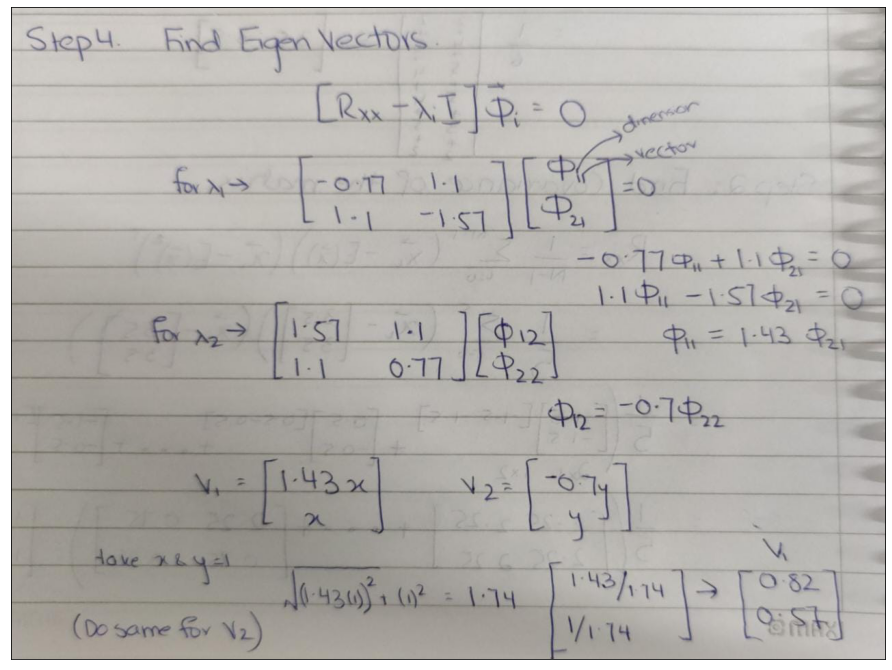

In [ ]:
showImage(5)

In [ ]:
eigen_values , eigen_vectors = np.linalg.???(cov_mat)

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

###Step 4: Sort Eigenvalues in descending order
Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)???
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

### Step 5: Select a subset from the rearranged Eigenvalue matrix
Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. This means we selected the first two principal components.

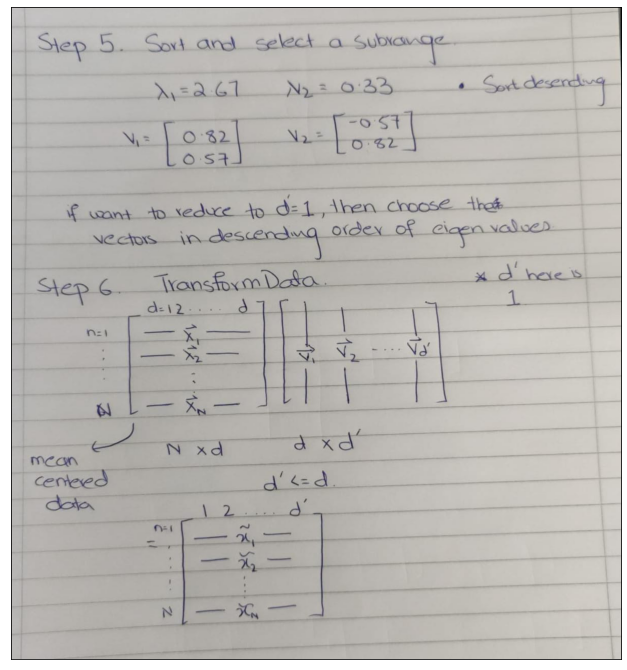

In [ ]:
showImage(6)

In [ ]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[???]

In [ ]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
# n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

###Step 6: Transform the data
Transform (project) the data by having a dot product between the mean-centered data and the Eigenvector subset. 

In [ ]:
#Transform the data 
X_reduced = np.dot(???,???)

In [ ]:
#Transform the data 
# X_reduced = np.dot(X_meaned,eigenvector_subset)#np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

## Combine all steps in a function

In [ ]:
def PCA(X , num_components):
     
    #Step-1
    ???
     
    #Step-2
    ???
     
    #Step-3
    ???
     
    #Step-4
    ???
    ???
    ???
     
    #Step-5
    ???
     
    #Step-6
    ???
     
    return X_reduced

In [ ]:
# def PCA(X , num_components):
     
#     #Step-1
#     X_meaned = X - np.mean(X , axis = 0)
     
#     #Step-2
#     cov_mat = np.cov(X_meaned , rowvar = False)
     
#     #Step-3
#     eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
#     #Step-4
#     sorted_index = np.argsort(eigen_values)[::-1]
#     sorted_eigenvalue = eigen_values[sorted_index]
#     sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
#     #Step-5
#     eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
#     #Step-6
#     X_reduced = np.dot(X_meaned,eigenvector_subset )#np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
#     return X_reduced

## Apply PCA function to the Iris dataset
The Iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris['data'], iris['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Among the 4 features, we can pick any two and plot with matplotlib (we color-coded the different classes using the c argument):

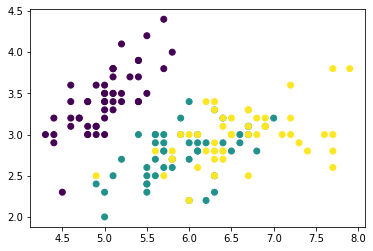

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We can also pick any three and show in 3D

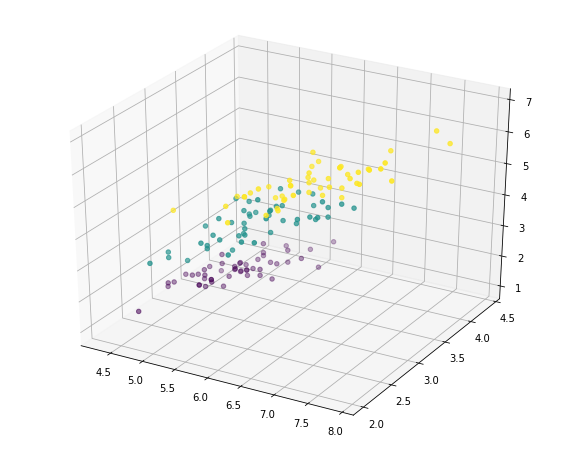

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

Transform the input data X by PCA into Xt. Consider only the first two columns, which contain the most information, and plot it in two dimensional.

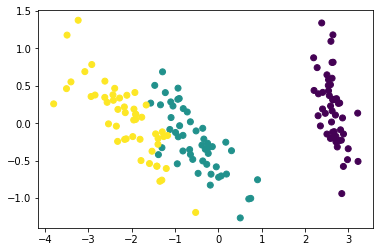

In [ ]:
Xt = PCA(X,2)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.show()

### Task: Use sklearn library to compute the PCA and compare to your implementation from scratch

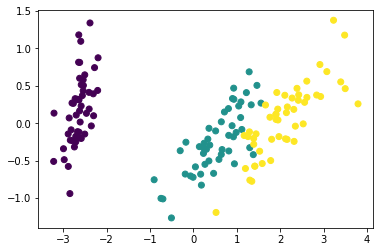

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
# pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
# Xt = pipe.fit_transform(X)
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.show()

## Bonus:  PCA with breast cancer dataset available from sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [ ]:
print(breast_cancer.target_names) 
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

['malignant' 'benign']
[[  0   1]
 [212 357]]


Examining the Relationship between Features and Target:

It is useful to be able to visualize how each feature affects the diagnosis — whether a tumor is malignant or benign. So let’s plot a histogram for each feature and then differentiate the malignant and benign tumors using color:

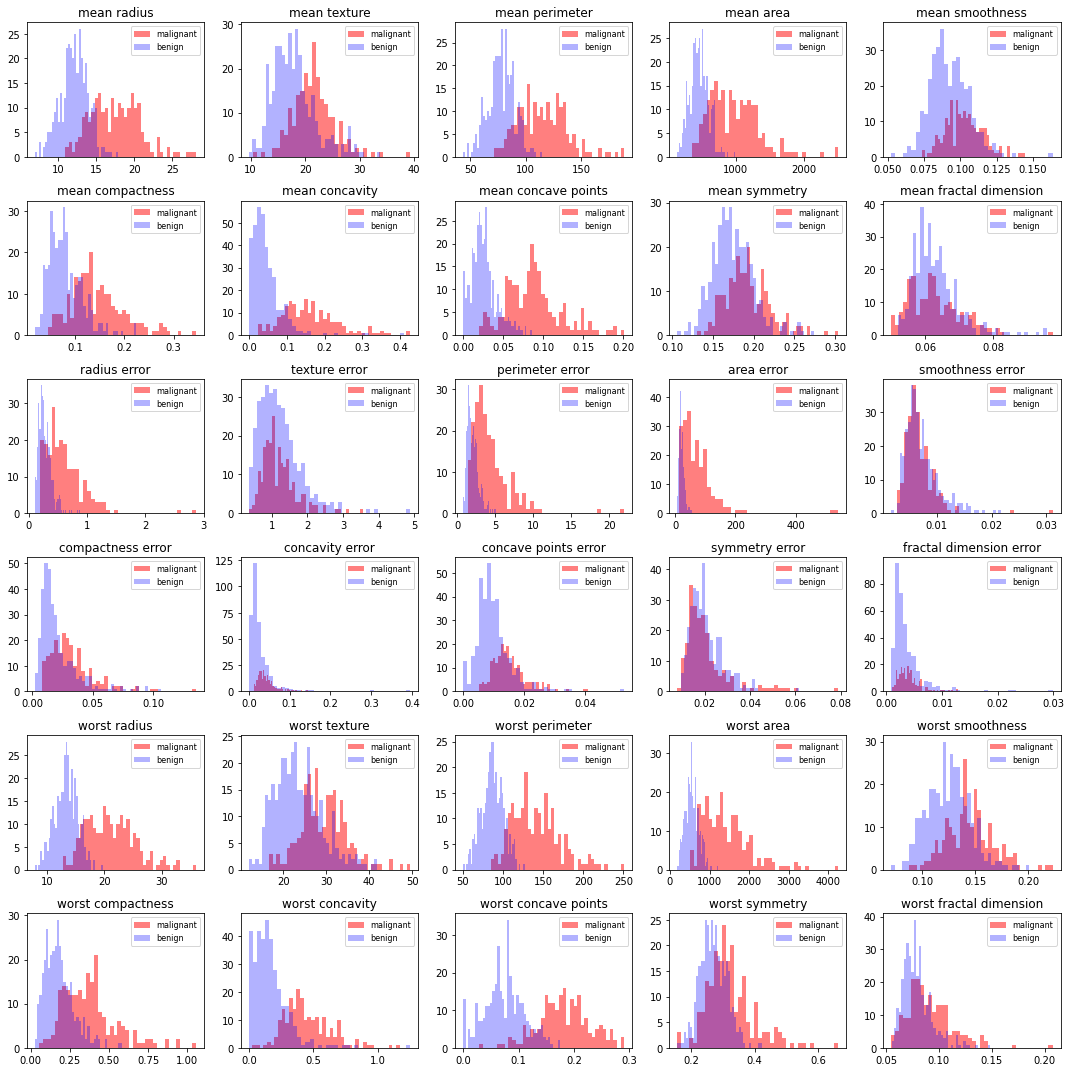

In [ ]:
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)    #---set the title---
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)        #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Train a logistic regression model using all the features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]      
y = df.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,
                     shuffle = True,random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9239766081871345

### Train a logistic regression model after applying PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = 6)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),('pca', _pca),('regressor', _model)])

# train the model using the PCA components
log_regress_model.fit(X_train,y_train)
log_regress_model.score(X_test,y_test)

0.9707602339181286